In [53]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

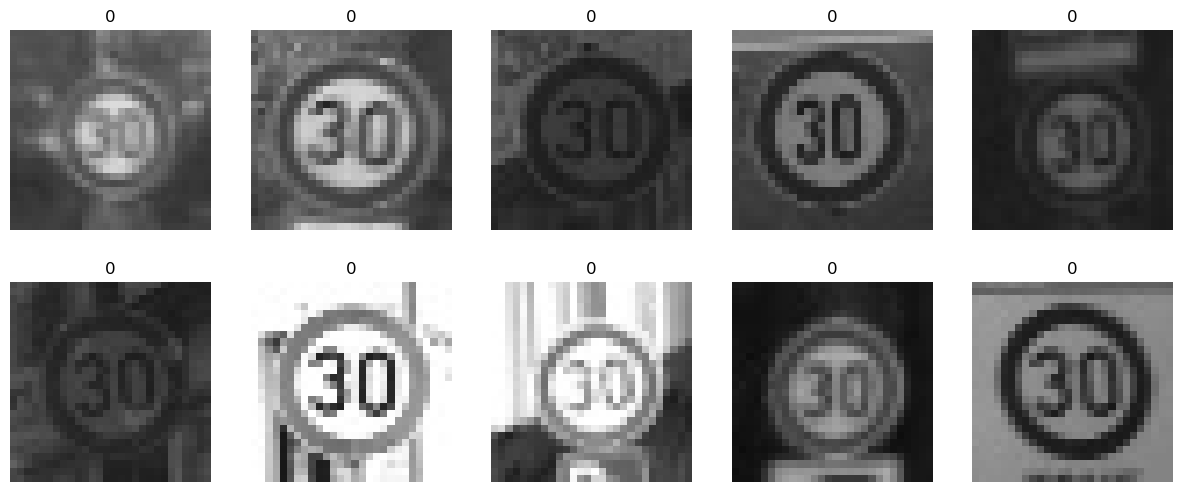

In [54]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

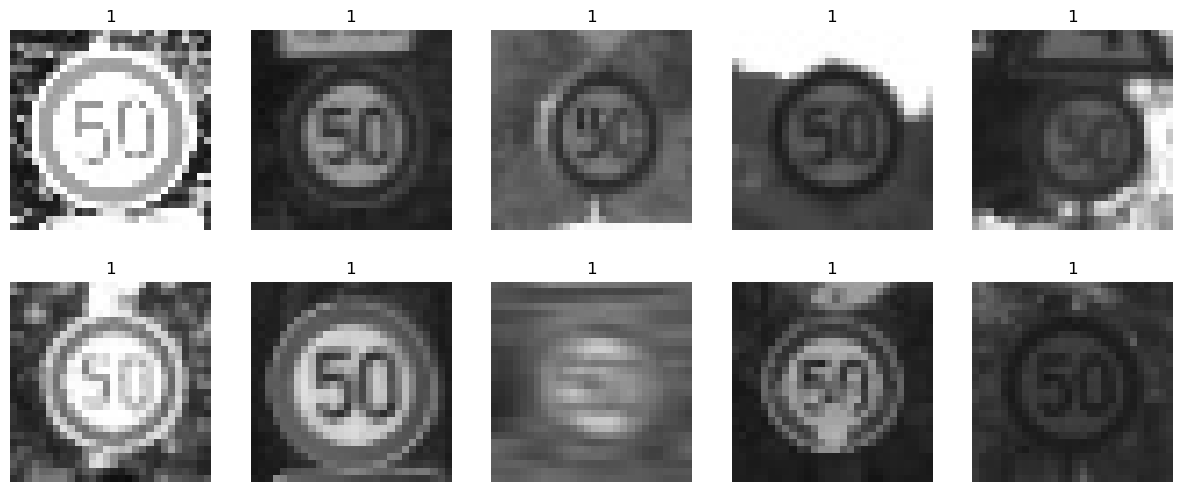

In [55]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [56]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [57]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [58]:
# now prepare for a single neuron training
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.008960962295532227


In [59]:
# Accuracy 0.8975391498881432
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Accuracy 0.9474272930648769
inputs = Input(shape=(pixels.shape[1],))
x = Dense(64, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(x)
model = Model(inputs, outputs)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,305 (196.50 KB)

 Trainable params: 50,305 (196.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [70]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.3555
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.1852
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1393
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.1158
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.0977
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0837
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.0886
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.0725
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.0737
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.0778


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

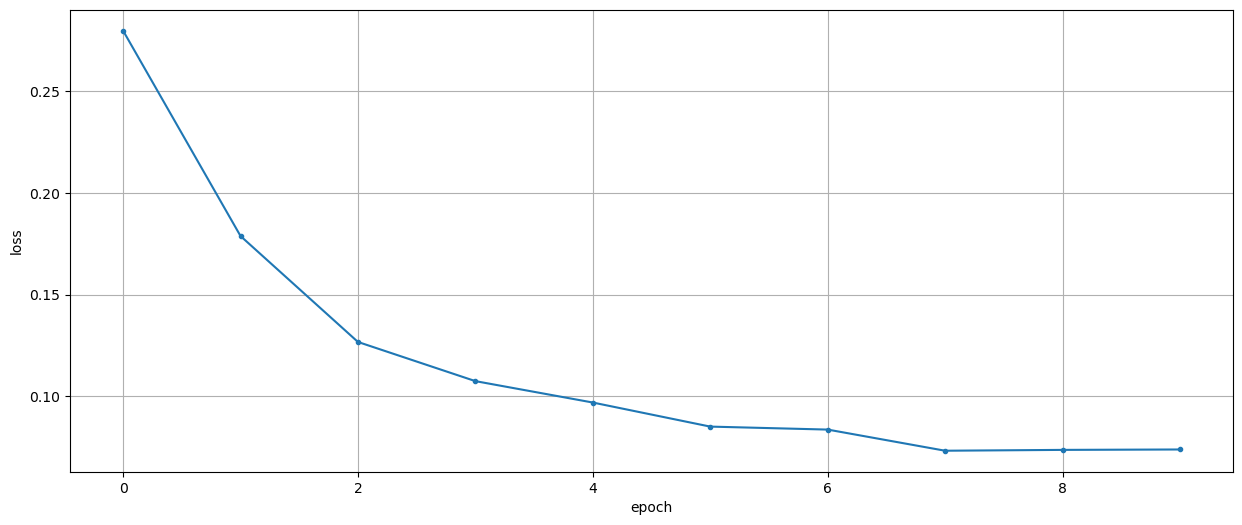

In [71]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[ 0.16647369 -0.00600436  0.2251783  -0.00263049 -0.00617056  0.00414995
  0.03482717 -0.00583802 -0.00600309 -0.00120952 -0.01945785 -0.00598511
 -0.00584365 -0.0028337  -0.00534519 -0.00671724 -0.00141461 -0.00390949
  0.23082186 -0.00567153 -0.00327516 -0.00455306 -0.00522394  0.14485227
  0.20269896 -0.00193934 -0.00519061 -0.0013384  -0.02492164  0.22659083
 -0.00577861  0.01341633 -0.0051989  -0.0049386  -0.00619198 -0.0044203
 -0.00248378 -0.00188831  0.14160918 -0.00847466 -0.00526691 -0.00393232
  0.150672   -0.13106844  0.08356421 -0.00890226  0.         -0.00627776
  0.17341313 -0.00409474  0.         -0.00600464  0.15910955 -0.0054192
 -0.00600332  0.16923967  0.         -0.0049067  -0.00463243 -0.00328763
  0.14612252  0.07692675  0.         -0.00599971] [ 0.16647369 -0.00600436  0.2251783  -0.00263049 -0.00617056  0.00414995
  0.03482717 -0.00583802 -0.00600309 -0.00120952 -0.01945785 -0.00598511
 -0.00584365 -0.0028337  -0.00534519 -0.00671724 -0.00141461 -0.00390949
  0

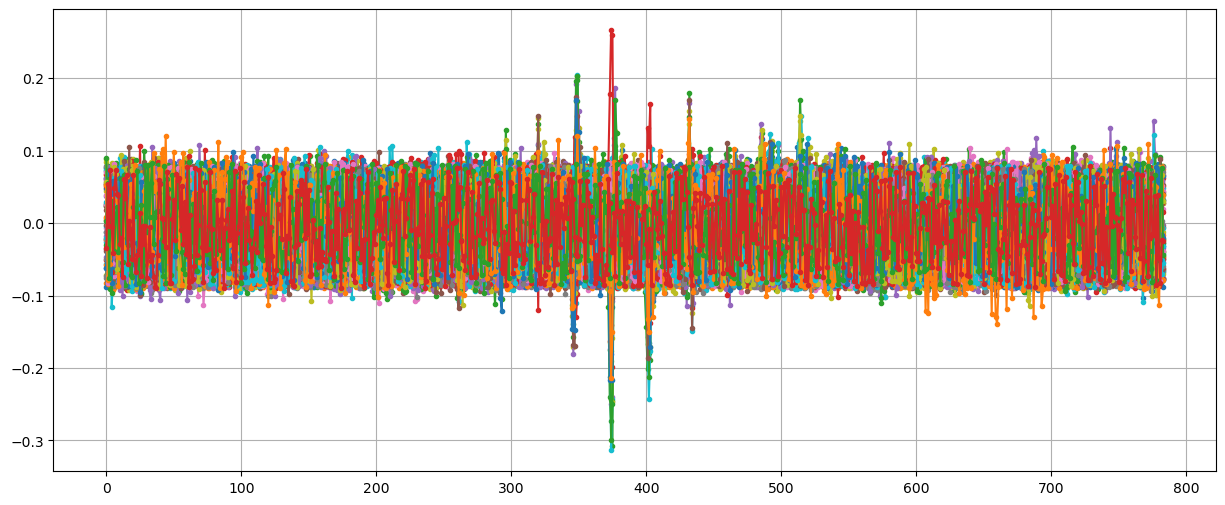

In [72]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [73]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


In [74]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9474272930648769


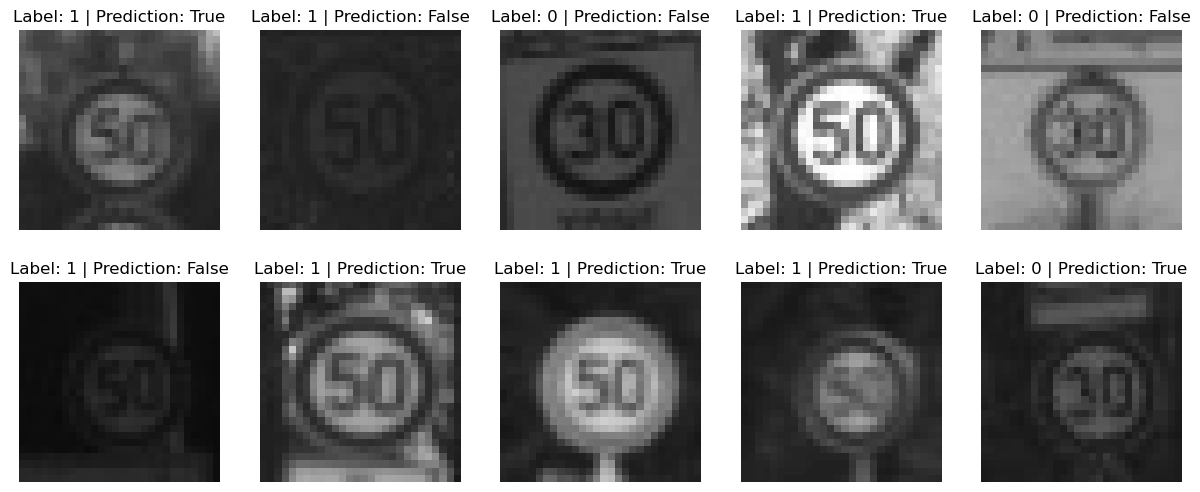

In [67]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)